# Comparing two jury rules simulation from Dekking 2005

Leon R. Adams

The simulation below is used to carry out the comparison of the two jury rules as found in Dekking 2005, Section 6.3. The challenge is to use a probabalistic model to choose between two competing scoring methodologies.




In [175]:
%matplotlib inline

In [176]:
import numpy as np
from matplotlib import pyplot as plt

In [120]:
#np.random.seed(123)

## Generating random scores

We will begin the analysis by constructing a model that will simulate the jury scoring of seven (7) judges. 

We generate 7 realizations from the uniform distribution from $U(0,1)$. 

In [121]:
Uniform_01 = np.random.rand(7)

In [122]:
print(Uniform_01)

[ 0.68482974  0.4809319   0.39211752  0.34317802  0.72904971  0.43857224
  0.0596779 ]


To generate realizations from $Z \sim U(-0.5, 0.5)$ uniform distribution, we subtract 0.5 from Uniform_01.

In [123]:
Z = Uniform_01 - 0.5

In [124]:
print(Z)

[ 0.18482974 -0.0190681  -0.10788248 -0.15682198  0.22904971 -0.06142776
 -0.4403221 ]


Deterministic part of jury score, set to be 8.

In [125]:
g = 8

Simulate stochastic behavior by adding noise to deterministic score.

In [126]:
Y = g + Z

In [127]:
print(Y)

[ 8.18482974  7.9809319   7.89211752  7.84317802  8.22904971  7.93857224
  7.5596779 ]


So, Y represents a simulated jury, with scores that have some deviations away from the true score.

## Model jury rules

We will know create models the two selection rules, where the first selection rule (h1) says:
> Discard highest and lowest, 
> then average remaining 5 scores

And the second selection rule (h2) says:
> Place item in ascending order,
> then pick the middle score

In [128]:
sortData = np.sort(Y)

In [129]:
print(sortData)

[ 7.5596779   7.84317802  7.89211752  7.93857224  7.9809319   8.18482974
  8.22904971]


In [130]:
middle5 = sortData[1:-1]
h1 = np.average(middle5)
h2 = sortData[3]

In [131]:
print(middle5)

[ 7.84317802  7.89211752  7.93857224  7.9809319   8.18482974]


In [132]:
print(h1)

7.96792588382


Given the selection rules, we can know look at the deviations from the true score (g = 8).

In [133]:
print(h2)

7.93857224468


In [134]:
T = h1 - g
M = h2 - g

In [135]:
print(T)

-0.0320741161812


In [136]:
print(M)

-0.0614277553204


Now we can make a decision, which rule is better? Remember $T$ and $M$ are deviations from the true score, so which ever value is closer to zero $(0)$ in absolute should be considered better than the other.

In [140]:
abs_M = abs(M)
abs_T = abs(T)

In [142]:
print('|M| = ', abs_M)
print('|T| = ', abs_T)

|M| =  0.0614277553204
|T| =  0.0320741161812


We have design and built a simulation model, to help in answering the question: which jury rule is better?

## Leverage simulations

In [254]:
nsims = 1000

In [250]:
Uniform_array = np.random.rand(nsims, 7)
Zarray = Uniform_array - 0.5
Yarray = g + Zarray

Yarray.sort(axis=1)
h2_vec = Yarray[:,3]
h1_vec = np.mean( Yarray[:,1:-1], axis=1)
M_vec = h2_vec - g
T_vec = h1_vec - g

(0, 0.5)

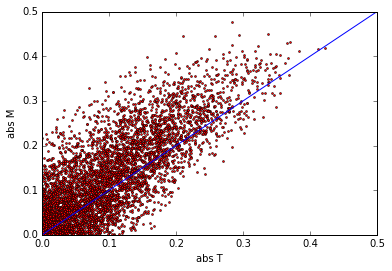

In [251]:
plt.plot(abs(T_vec), abs(M_vec), 'ro', markersize=2)
plt.plot([0,0.5],[0,0.5], 'b-')
plt.xlabel('abs T')
plt.ylabel('abs M')
plt.xlim((0,0.5))
plt.ylim((0,0.5))

Blue abline in plot above is an indication that T and M are an equal distance away from true 'g' score (Neither is preferred). However, plot has some indication that M has a **larger deviation** from 'g' than does T.

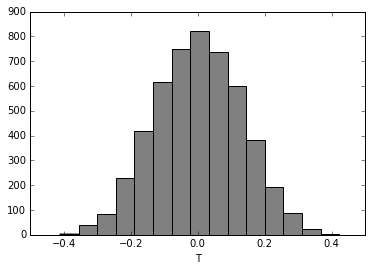

In [252]:
plt.hist(T_vec, bins=15, color='gray')
plt.xlabel('T')

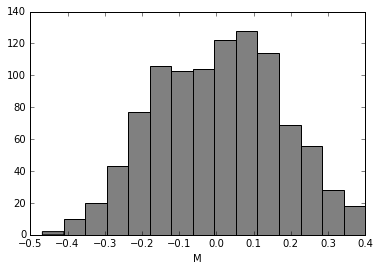

In [244]:
plt.hist(M_vec, bins=15, color='gray')
plt.xlabel('M')

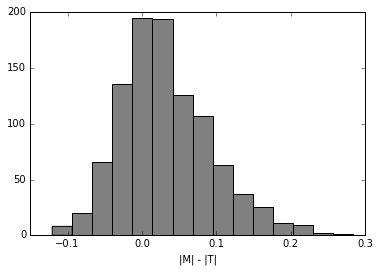

In [245]:
plt.hist(abs(M_vec) - abs(T_vec), bins=15, color='gray')
plt.xlabel('|M| - |T|')

In [246]:
test = abs(M_vec) - abs(T_vec)

In [256]:
prob_M_better_T = 1 - (np.sum(test >= 0.0))/nsims

In [257]:
print('Probability M better than T:', prob_M_better_T)

Probability M better than T: 0.308


By increasing the number of simulation we can get better probability estimate. And we can provide an answer to the question: which rule is better.